In [29]:
from forecasting_models.model_selector import select_forecasting_model
from metrics.metric_selector import error_selector
from utils.testing_functions import split_series
from utils.plots import plot_df
import pandas as pd

In [30]:
df_alb = pd.read_csv("data/peajes_alberdi_training_preproc.csv")
df_alb['date'] = pd.to_datetime(df_alb['fecha'], format = '%Y-%m-%d')

In [31]:
df_alb_train = df_alb.copy()[df_alb['date'] < '2019-07-01']
df_alb_test = df_alb.copy()[df_alb['date'] >= '2019-07-01']

In [32]:
models_ran = []
test_error_by_model = {}

In [33]:
x_feature_name = "date"
y_feature_name = "cantidad_pasos"

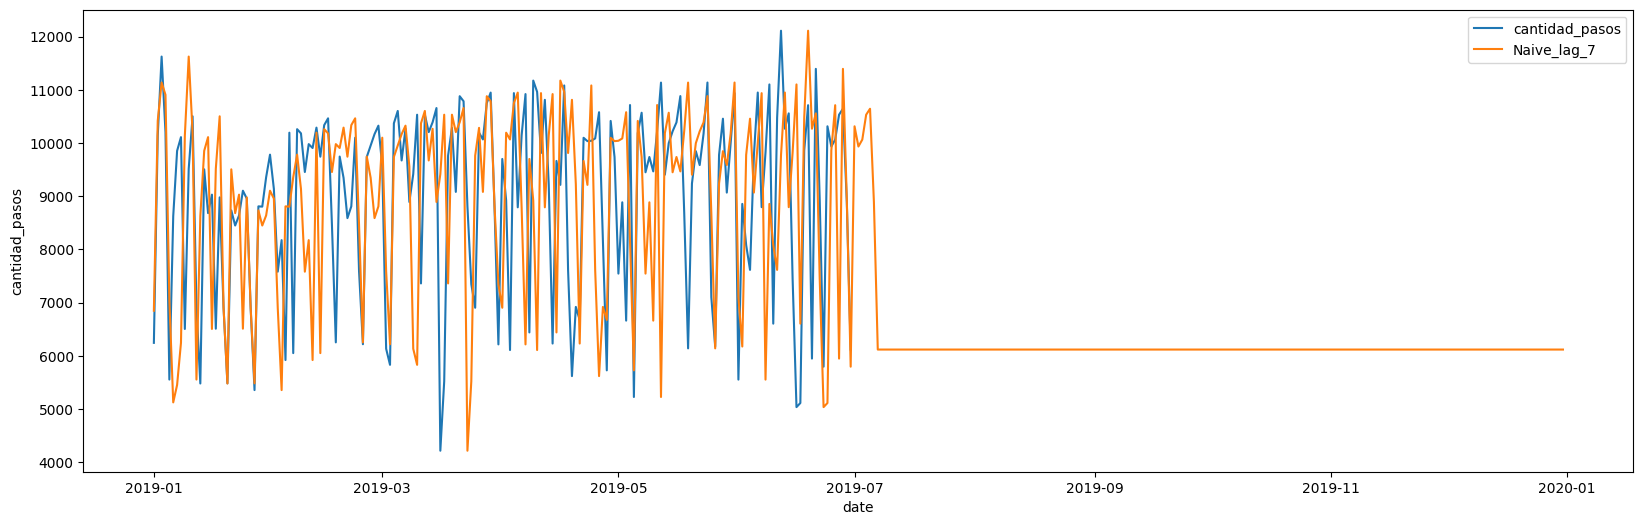

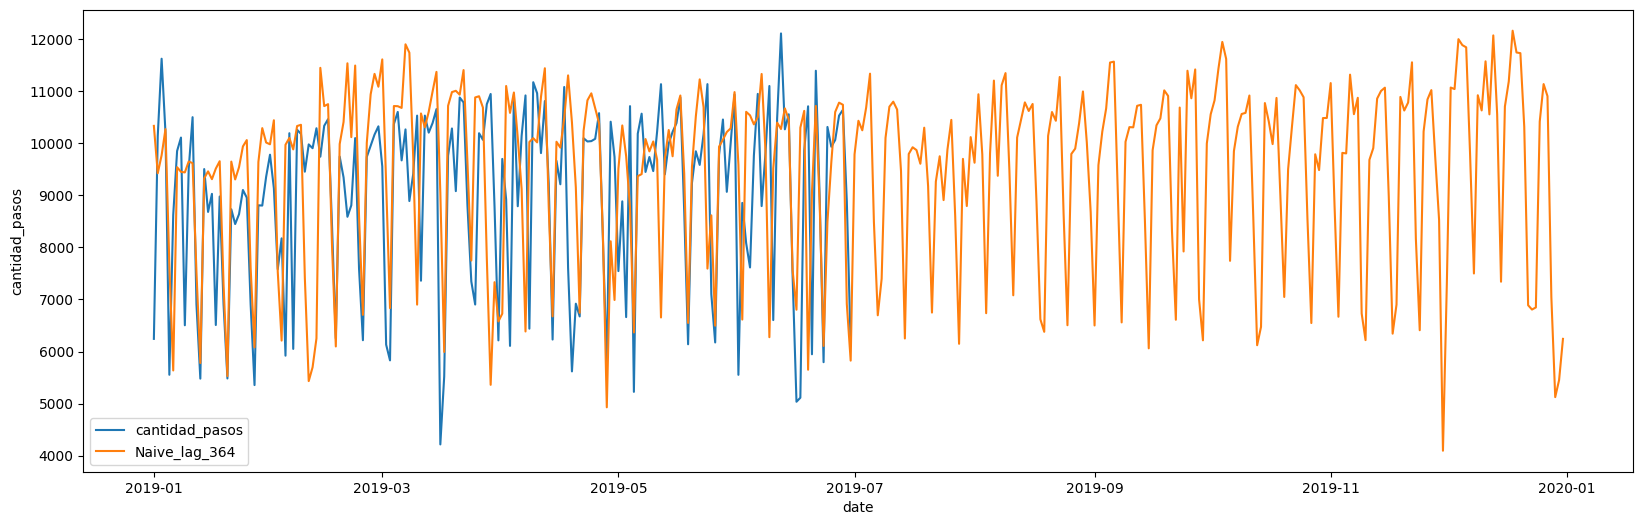

In [45]:
model_class = select_forecasting_model("Naive")

for periods in [7, 364]:
    model_instance = model_class(df=df_alb_train.copy(), x_col_name=x_feature_name, y_col_name=y_feature_name, n_periods=periods)
    model_instance.fit_train()
    fitted_data, predicted_data = model_instance.predict(df_alb_test.copy()[[x_feature_name]])
    df_alb[model_instance.model_name] = fitted_data + predicted_data
    models_ran.append(model_instance.model_name)
    plot_df(df_alb, x_col=x_feature_name, y_cols=[y_feature_name, model_instance.model_name], min_date="2019-01-01")

In [ ]:
# ERROR USAGE EXAMPLE
error_class = error_selector("MAPE")

model_class = select_forecasting_model("Naive")
whole_df = df_alb_train.copy()


train_df, test_df = split_series(df=whole_df, start_test_date="2018-01-01", end_test_date="2019-01-01", date_col_name="date")

model_instance = model_class(df=train_df, x_col_name='date', y_col_name='cantidad_pasos', n_periods=364)


model_instance.fit_train()
fitted_data, predicted_data = model_instance.predict(test_df.copy()[['date']])

error_instance = error_class(y_true=test_df['cantidad_pasos'], y_pred=predicted_data)
print(error_instance.calculate_error())

In [ ]:
model_class = select_forecasting_model("Naive")
for periods in [1, 7, 364]:
    model_instance = model_class(df=df_alb_train.copy(), x_col_name='date', y_col_name='cantidad_pasos', n_periods=periods)
    model_instance.fit_train()
    y_test = model_instance.predict(df_alb_test.copy()[['date']])
    model_instance.plot_results(start_date='2016-08-01', end_date='2017-08-01')

In [ ]:
model_class = select_forecasting_model("rolling_mean")
for period in [3, 7, 364]:
    model_instance = model_class(df=df_alb_train.copy(), x_col_name='date', y_col_name='cantidad_pasos', n_periods=period)
    model_instance.fit_train()
    model_instance.predict(df_alb_test.copy()[['date']])
    model_instance.plot_results(start_date='2019-01-01', end_date='2019-09-01')

In [ ]:
model_class = select_forecasting_model("exponential_smoothing")

for alpha in [0.2, 0.5, 0.8]:
    model_instance = model_class(df=df_alb_train.copy(), x_col_name='date', y_col_name='cantidad_pasos', smoothing_level=alpha)
    model_instance.fit_train()
    y_test = model_instance.predict(df_alb_test.copy()[['date']])
    model_instance.plot_results(start_date='2019-01-01', end_date='2019-09-01')

In [ ]:
model_class = select_forecasting_model("holt")

for beta in [0.2, 0.5, 0.8]:
    model_instance = model_class(df=df_alb_train.copy(), x_col_name='date', y_col_name='cantidad_pasos', smoothing_level=0.5, smoothing_trend=beta)
    model_instance.fit_train()
    y_test = model_instance.predict(df_alb_test.copy()[['date']])
    model_instance.plot_results(start_date='2019-01-01', end_date='2019-09-01')

In [ ]:
model_class = select_forecasting_model("holt_winters")

for gamma in [0.2, 0.5, 0.8]:
    model_instance = model_class(df=df_alb_train.copy(), x_col_name='date', y_col_name='cantidad_pasos', smoothing_level=0.5, smoothing_trend=0.1, smoothing_seasonal=gamma, trend="additive", seasonal="additive", seasonal_periods=364)
    
    model_instance.fit_train()
    y_test = model_instance.predict(df_alb_test.copy()[['date']])
    model_instance.plot_results(start_date='2019-01-01', end_date='2019-09-01')

In [ ]:
model_class = select_forecasting_model("optimized_exponential_smoothing")

model_instance = model_class(df=df_alb_train.copy(), x_col_name='date', y_col_name='cantidad_pasos', trend="additive", seasonal="additive", seasonal_periods=364)

model_instance.fit_train()
y_test = model_instance.predict(df_alb_test.copy()[['date']])
model_instance.plot_results(start_date='2019-01-01', end_date='2019-09-01')